# Statistique inférentielle - Théorie de l'échantillonnage - Exercice 10.1


Une population est constituée des cinq nombres 2, 3, 6, 8 et 11. 

On considère tous les échantillons non exhaustifs possibles de taille deux de cette population. 

Trouver:

- La moyenne de la population
- L’écart-type de la population
- La moyenne de la distribution d’échantillonnage des moyennes
- L’écart-type de la distribution d’échantillonnage des moyennes

In [78]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [79]:
population_df = pd.DataFrame({'value':[2,3,6,8,11]})

## Calcul explicite (sans recourir à des fonctions de librairie)

In [80]:
moyenne_population = population_df['value'].mean()
moyenne_population

6.0

In [81]:
population_df['delta'] = population_df['value'] - population_df['value'].mean()

In [82]:
population_df['delta2'] = population_df['delta']**2

In [83]:
population_df

,value,delta,delta2
0,2,-4.0,16.0
1,3,-3.0,9.0
2,6,0.0,0.0
3,8,2.0,4.0
4,11,5.0,25.0


In [84]:
N = population_df.shape[0]

variance_population = population_df['delta2'].sum()/N
ecart_type_population = math.sqrt(variance_population)
print('Variance de la population:{0:.2f}\nEcart_type de la population:{1:.2f}'.format(variance_population,ecart_type_population))

Variance de la population:10.80
Ecart_type de la population:3.29


Générons systématiquement tous les échantillons possibles, de taille deux (n) tirés de la population initiale de manière non-exhaustive.

Et stockons le résultat dans un nouveau DataFrame, echantillon_df.

Chaque ligne contiendra les valeurs d'un échantillon.

Nous aurons:

In [85]:
n = 2

first_value = []
second_value = []
for value1 in population_df['value']:
    for value2 in population_df['value']:
        first_value.append(value1)
        second_value.append(value2)
echantillon_df = pd.DataFrame({'first_value':first_value,'second_value':second_value})
echantillon_df

,first_value,second_value
0,2,2
1,2,3
2,2,6
3,2,8
4,2,11
5,3,2
6,3,3
7,3,6
8,3,8
9,3,11


Calculons la moyenne de chaque échantillon (chaque ligne), à partir de la fonction 'apply' du DataFrame.

Définissons la fonction moyenne d'un échantillon:

In [86]:
def moyenne(x):
    return (x['first_value']+x['second_value'])/2

Appliquons cette fonction sur chaque ligne (=> option: axis=1). Nous aurons:

In [87]:
echantillon_df['moyenne'] = echantillon_df.apply(moyenne,axis=1)

In [88]:
echantillon_df.tail()

,first_value,second_value,moyenne
20,11,2,6.5
21,11,3,7.0
22,11,6,8.5
23,11,8,9.5
24,11,11,11.0


Même chose mais en fonction 'lambda', code plus compact...

In [89]:
echantillon_df['lambda moyenne'] = echantillon_df.apply(lambda r:(r['first_value']+r['second_value'])/2, axis=1)

In [90]:
echantillon_df['moyenne'].mean(), echantillon_df['moyenne'].std()

(6.0, 2.3717082451262845)

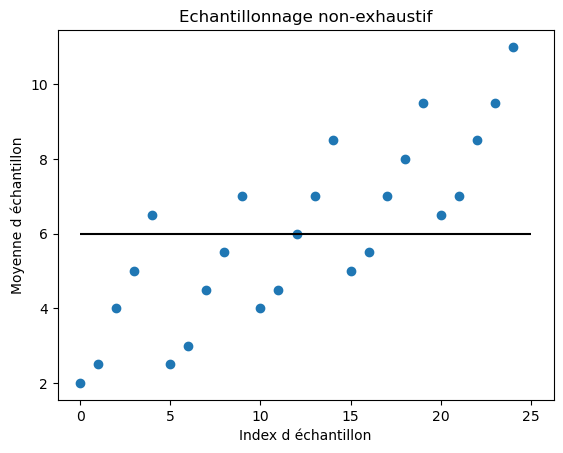

In [91]:
plt.scatter(x=echantillon_df.index,y=echantillon_df['moyenne'])
plt.ylabel('Moyenne d échantillon')
plt.xlabel('Index d échantillon')
plt.hlines(echantillon_df['moyenne'].mean(),0,echantillon_df.shape[0],color='black')
plt.title('Echantillonnage non-exhaustif')
plt.show()

In [92]:
#
# Autre représentation en plotly pour pouvoir visualiser le contenu explicite de chaque échantillon (étiquette)
#
echantillon_df['index'] = echantillon_df.index
echantillon_df['etiquette'] = echantillon_df.apply(lambda x: '{}-{}'.format(x['first_value'],x['second_value']), axis=1)

fig = px.scatter(echantillon_df, x="index", y="moyenne", hover_name='etiquette')
fig.update_traces(marker_size=10)

fig.add_hline(y=np.mean(echantillon_df['moyenne']))

fig.update_yaxes(title='Moyenne échantillon')
fig.update_xaxes(title='Index échantillon')
fig.update_layout(title='Echantillonnage non-exhaustif')

fig.show()

In [93]:
n_echantillons = echantillon_df.shape[0]

moyenne_distribution_moyenne = echantillon_df['moyenne'].sum()/n_echantillons
print('Moyenne de la distribution des moyennes:{0:.2f} sur {1:} échantillon(s)'.format(moyenne_distribution_moyenne, n_echantillons))

Moyenne de la distribution des moyennes:6.00 sur 25 échantillon(s)


On retrouve bien la moyenne de la population, comme il se doit!

Pour chaque échantillon, calculons l'écart de la moyenne de l'échantillon par rapport à la moyenne des moyennes => colonne delta.

Puis calculons le carré de ces écarts => colonne: delta2

In [94]:
echantillon_df['delta'] = echantillon_df['moyenne']-moyenne_distribution_moyenne
echantillon_df['delta2'] = echantillon_df['delta']**2

In [95]:
echantillon_df

,first_value,second_value,moyenne,lambda moyenne,index,etiquette,delta,delta2
0,2,2,2.0,2.0,0,2.0-2.0,-4.0,16.00
1,2,3,2.5,2.5,1,2.0-3.0,-3.5,12.25
2,2,6,4.0,4.0,2,2.0-6.0,-2.0,4.00
3,2,8,5.0,5.0,3,2.0-8.0,-1.0,1.00
4,2,11,6.5,6.5,4,2.0-11.0,0.5,0.25
5,3,2,2.5,2.5,5,3.0-2.0,-3.5,12.25
6,3,3,3.0,3.0,6,3.0-3.0,-3.0,9.00
7,3,6,4.5,4.5,7,3.0-6.0,-1.5,2.25
8,3,8,5.5,5.5,8,3.0-8.0,-0.5,0.25
9,3,11,7.0,7.0,9,3.0-11.0,1.0,1.00


La variance de la distribution des moyennes sera estimée comme la simple moyenne de ces carrés d'écarts, soit:

In [96]:
variance_distribution_moyenne = echantillon_df['delta2'].sum()/n_echantillons
print('Variance de la distribution des moyennes:{0:.2f}'.format(variance_distribution_moyenne))

Variance de la distribution des moyennes:5.40


A ce niveau, on vérifiera que cette variance peut se calculer directement à partir de la variance de la population suivant la formule: 

variance de la distribution des moyennes d'échantillon = variance_population / taille d'échantillon soit:

In [97]:
variance_population/2

5.4

De là, on tire l'écart-type comme racine carrée de la variance, soit:

In [98]:
ecart_type_distribution_moyenne = math.sqrt(variance_distribution_moyenne)
print('Ecart type de la distribution des moyennes:{0:.2f}'.format(ecart_type_distribution_moyenne))

Ecart type de la distribution des moyennes:2.32


## Calcul en utilisant des primitives de librairie (ici, numpy):

In [99]:
np.mean(echantillon_df['moyenne'])

6.0

In [100]:
np.std(echantillon_df['moyenne'])

2.32379000772445

## Représentation graphique d'un histogramme des moyennes d'échantillon (n=2):

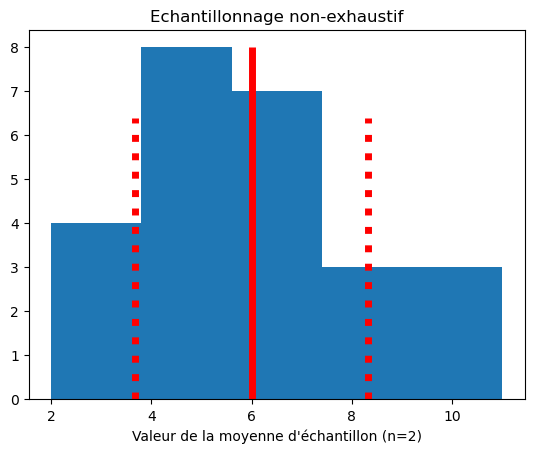

In [101]:
plt.hist(echantillon_df['moyenne'], bins=5)
plt.xlabel("Valeur de la moyenne d'échantillon (n=2)")

# 
# Visualisation du centre de la distribution +- 1 écart-type
#
ymin = 0
ymax = 8
color = 'red'
linewidth = 5
plt.vlines(x=np.mean(echantillon_df['moyenne']),ymin=ymin,ymax=ymax,color=color,linewidth=linewidth)
plt.vlines(x=np.mean(echantillon_df['moyenne'])+np.std(echantillon_df['moyenne']),ymin=ymin,ymax=0.8*ymax,color=color,linewidth=linewidth,linestyles='dotted')
plt.vlines(x=np.mean(echantillon_df['moyenne'])-np.std(echantillon_df['moyenne']),ymin=ymin,ymax=0.8*ymax,color=color,linewidth=linewidth,linestyles='dotted')

plt.title('Echantillonnage non-exhaustif')
plt.show()

In [102]:
#
# Version plotly
#
fig = px.histogram(echantillon_df, x='moyenne')

fig.add_vline(x=np.mean(echantillon_df['moyenne']), line_dash = 'solid', line_color = 'red', line_width=linewidth)
fig.add_vline(x=np.mean(echantillon_df['moyenne'])-np.std(echantillon_df['moyenne']), line_dash = 'dot', line_color = color, line_width=linewidth)
fig.add_vline(x=np.mean(echantillon_df['moyenne'])+np.std(echantillon_df['moyenne']), line_dash = 'dot', line_color = color, line_width=linewidth)
fig.update_xaxes(title="Valeur de la moyenne d'échantillon (n=2)")

fig.show()